In [1]:
# 필요한 라이브러리 불러오기
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

C:\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
#이 명령을 써주어야 쥬피터 노트북 상에서 그래프가 표시된다
%matplotlib inline

In [3]:
#한글폰트 설정
import os
if os.name == 'posix':
    plt.rc("font",family="AppleGothic")
else:
    plt.rc("font", family="Malgun Gothic")

In [4]:
#폰트깨지는 현상 방지코드
plt.rc("axes", unicode_minus=False)

In [5]:
#글씨 흐릿 방지 코드 
%config InlineBackend.figure_format='retina'

In [6]:
#4-1 초기환경 세팅 끝 

#4-2 시작 건강검진정보 2017년 데이터를 이용하여 데이터 분석을 진행할 것이다

In [7]:
#건강검진정보(2017) 데이터 불러오기
df = pd.read_csv("./건강검진정보(2017).csv", encoding="cp949")

In [8]:
# 불러온 데이터의 행, 열 수 확인
df.shape

(1000000, 34)

In [9]:
#데이터 5개 미리보기
#이런 저런 데이터들이 있는 것을 알 수 있다
df.head()

,기준년도,가입자일련번호,성별코드,연령대코드(5세단위),시도코드,신장(5Cm단위),체중(5Kg단위),허리둘레,시력(좌),시력(우),...,감마지티피,흡연상태,음주여부,구강검진수검여부,치아우식증유무,결손치유무,치아마모증유무,제3대구치(사랑니)이상,치석,데이터공개일자
0,2017,1,1,8,43,170,75,90.0,1.0,1.0,...,40.0,1.0,Y,Y,NaN,NaN,NaN,NaN,Y,2018-11-26
1,2017,2,1,7,11,180,80,89.0,0.9,1.2,...,27.0,3.0,N,Y,NaN,NaN,NaN,NaN,NaN,2018-11-26
2,2017,3,1,9,41,165,75,91.0,1.2,1.5,...,68.0,1.0,N,N,NaN,NaN,NaN,NaN,NaN,2018-11-26
3,2017,4,1,11,48,175,80,91.0,1.5,1.2,...,18.0,1.0,N,Y,NaN,NaN,NaN,NaN,N,2018-11-26
4,2017,5,1,11,30,165,60,80.0,1.0,1.2,...,25.0,1.0,N,Y,NaN,NaN,NaN,NaN,N,2018-11-26


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 34 columns):
 #   Column        Non-Null Count    Dtype  
---  ------        --------------    -----  
 0   기준년도          1000000 non-null  int64  
 1   가입자일련번호       1000000 non-null  int64  
 2   성별코드          1000000 non-null  int64  
 3   연령대코드(5세단위)   1000000 non-null  int64  
 4   시도코드          1000000 non-null  int64  
 5   신장(5Cm단위)     1000000 non-null  int64  
 6   체중(5Kg단위)     1000000 non-null  int64  
 7   허리둘레          999734 non-null   float64
 8   시력(좌)         999817 non-null   float64
 9   시력(우)         999811 non-null   float64
 10  청력(좌)         999842 non-null   float64
 11  청력(우)         999844 non-null   float64
 12  수축기혈압         999981 non-null   float64
 13  이완기혈압         999982 non-null   float64
 14  식전혈당(공복혈당)    999958 non-null   float64
 15  총콜레스테롤        999957 non-null   float64
 16  트리글리세라이드      999955 non-null   float64
 17  HDL콜레스테롤      999956 non-nul

In [11]:
#4-2 끝

#4-3 시작 로드한 데이터의 결측치를 보고 요약, 집계하기 -info, isnull, value_counts 

In [12]:
# 결측치 파악 해보기 -> 결측치는 true로 출력됨
df.isnull()

,기준년도,가입자일련번호,성별코드,연령대코드(5세단위),시도코드,신장(5Cm단위),체중(5Kg단위),허리둘레,시력(좌),시력(우),...,감마지티피,흡연상태,음주여부,구강검진수검여부,치아우식증유무,결손치유무,치아마모증유무,제3대구치(사랑니)이상,치석,데이터공개일자
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,True,True,True,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,True,True,True,True,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,True,True,True,True,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,True,True,True,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,True,True,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,True,True,True,True,False
999996,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,True,True,True,True,False
999997,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,True,True,True,True,False
999998,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,True,True,True,True,False


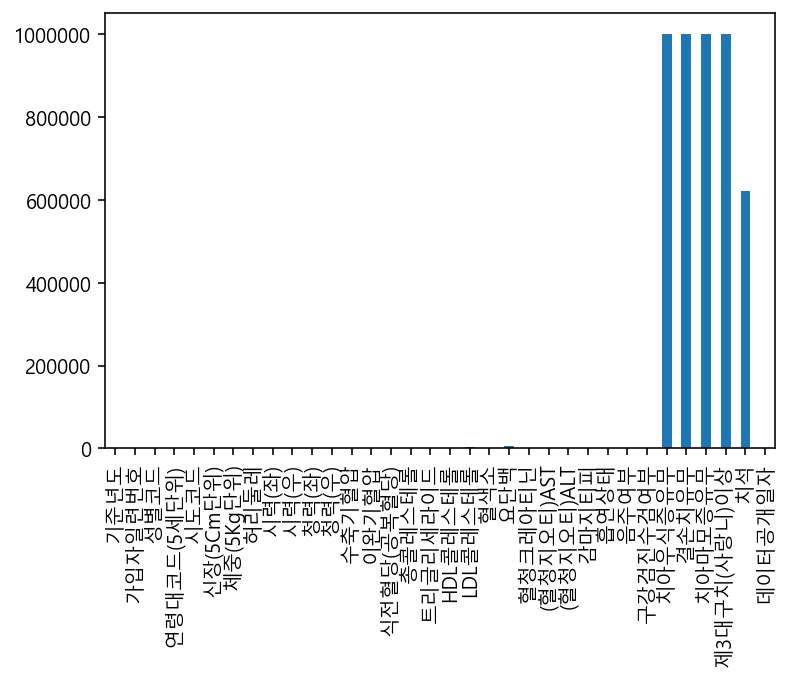

In [13]:
#결측치수를 시각화해보기
#치아데이터 부분에서 결측치가 많다는 것을 결과로 확인할 수 있었다
df.isnull().sum().plot.bar()

In [14]:
#여러 컬럼 가져와 보기
#"(혈청지오티)ALT", "(혈청지오티)AST" 를 가져와본다
df[["(혈청지오티)ALT", "(혈청지오티)AST"]] 
#대괄호 2번해주어야 데이터 프레임형태로 출력해준다

,(혈청지오티)ALT,(혈청지오티)AST
0,35.0,21.0
1,36.0,20.0
2,32.0,47.0
3,34.0,29.0
4,12.0,19.0
...,...,...
999995,36.0,26.0
999996,17.0,14.0
999997,27.0,30.0
999998,14.0,21.0


In [15]:
#가져온"(혈청지오티)ALT", "(혈청지오티)AST" 를 요약해본다
#count(수), mean(평균), std(표준편차), min(최소), max(최소), 25%(1,4분위), 50%(2,4분위=중앙값), 75%(3,4분위)
df[["(혈청지오티)ALT", "(혈청지오티)AST"]].describe()

,(혈청지오티)ALT,(혈청지오티)AST
count,999958.000000,999959.000000
mean,25.749509,25.994671
std,26.294770,23.587469
min,1.000000,1.000000
25%,15.000000,19.000000
50%,20.000000,23.000000
75%,29.000000,28.000000
max,7210.000000,9999.000000


In [16]:
#value_counts -> 빈도수 집계 can
#남성(1), 여성(2) 데이터인 성별코드로 그룹화하고 갯수 집계해보기
df["성별코드"].value_counts()

1    530410
2    469590
Name: 성별코드, dtype: int64

In [17]:
### 4-3끝

##4-4 시작 두개이상의 컬럼값을 분석해보고싶다하면 groupby와 pivot_table사용을 이해한다
#둘은 비슷하지만 약간의 차이가 있다 이를 이해해보자

In [18]:
#?를 통해서 공식문서를 볼 수 있다
#이를 보면서 이해도를 높이기 위해 예시(Examples)를 보는 것을 추천한다.
#어떤식으로 groupby를 사용하는지 알 수 있다
df.groupby?

In [19]:
#성별코드로 그룹화 한 데이터를 세본다
#가입자일련번호로 성별인 남성, 여성이 몇명이 되는지 세보았다
df.groupby(["성별코드"])["가입자일련번호"].count()

성별코드
1    530410
2    469590
Name: 가입자일련번호, dtype: int64

In [20]:
#성별코드와 음주여부로 그룹화하고 갯수를 세어본다
#1은 남성, 2는 여성-> 음주 안함(N)몇명, 음주 함(Y) 몇명을 알 수 있다
df.groupby(["성별코드", "음주여부"])["가입자일련번호"].count()

성별코드  음주여부
1     N       173612
      Y       356587
2     N       326827
      Y       142438
Name: 가입자일련번호, dtype: int64

In [21]:
#성별코드와 음주여부로 그룹화하고 감마지피티의 평균을 구해본다
df.groupby(["성별코드", "음주여부"])["감마지티피"].mean()
#->음주 여부에 따라사 감마지티피가 얼마나 차이나는지를 봤더니 음주하는 사람이 상대적으로 높게 나타나는 것을 볼 수 있었음
#감마지티피와 음주와의 관계를 알수있게되었다

성별코드  음주여부
1     N       34.739868
      Y       56.610981
2     N       22.612408
      Y       25.001018
Name: 감마지티피, dtype: float64

In [22]:
#groupby와 같은 기능을 하는 pivot_table을 이용해볼 것이다
#pivot과 pivot_table의 차이점
#-> pivot은 연산은 하지않고 데이터 형태만 바꾸고자할때사용, pivot_table은 연산을 하고자할 때 사용

In [23]:
#음주여부에 따른 그룹화된 수를 피봇테이블로 구한다
#데이터프레임형태로 출력되는 것을 볼 수 있다(groupby와이 차이점)
#groupby보다 pivot_table이 좀더 직관적
df.pivot_table(index="음주여부", values="가입자일련번호", aggfunc="count")

,가입자일련번호
음주여부,
N,500439
Y,499025


In [24]:
#음주여부에 따른 감마지티피의 평균을 구한다 (불러올데이터, 앞의 인덱스, 값, 구할것)
pd.pivot_table(df, index="음주여부", values="감마지티피", aggfunc='mean')

,감마지티피
음주여부,
N,26.819650
Y,47.588675


In [25]:
#groupby는 약간 빠르고 pivot_table은 직관적이다
#서로의 기능을 다 할수 있다

In [26]:
#4-4 끝

#4-5 시작. 히스토그램으로 전체 수치 데이터를 한번에 시각화 하기

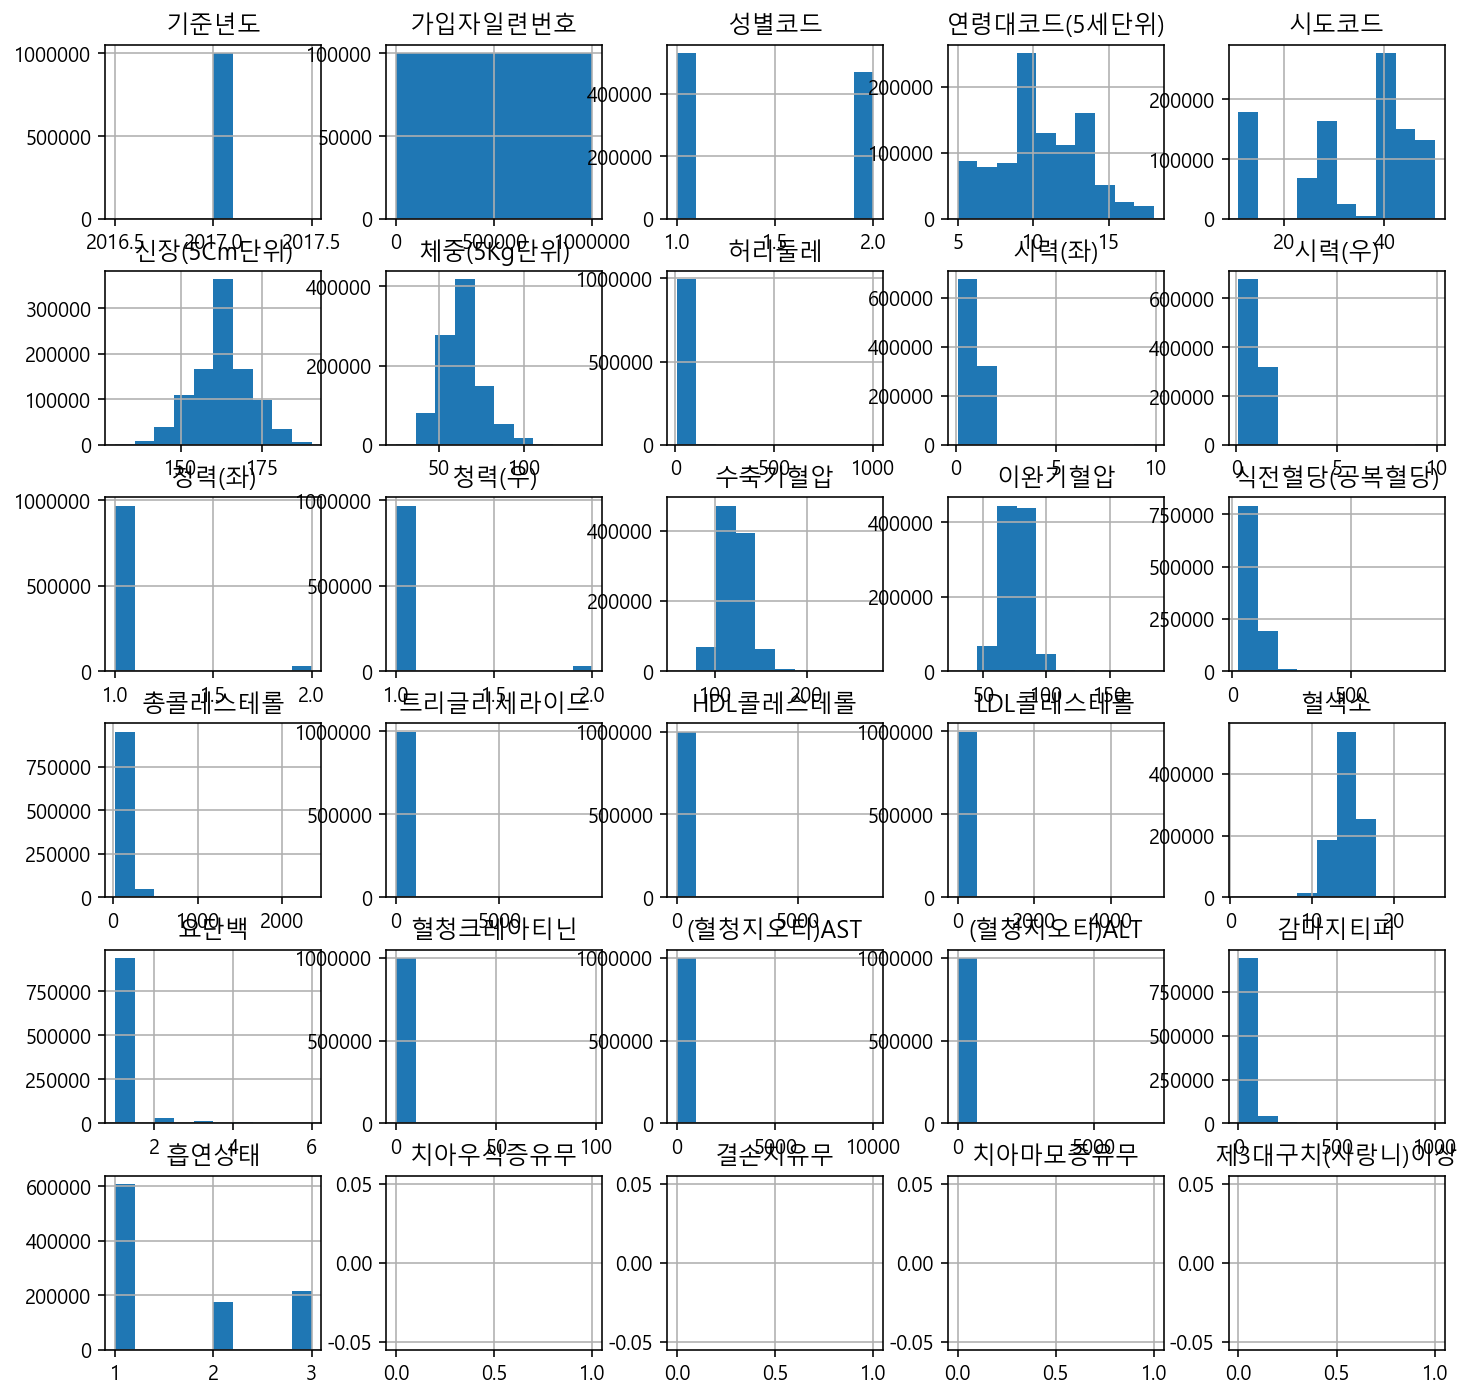

In [27]:
#100만개가 넘는 데이터를 시각화 할 때는 되도록이면  groupby 혹은 pivot_table로 연산을 하고 시각화하는 것을 권장
#전체 데이터에 대한 히스토그램
h = df.hist(figsize=(12,12))

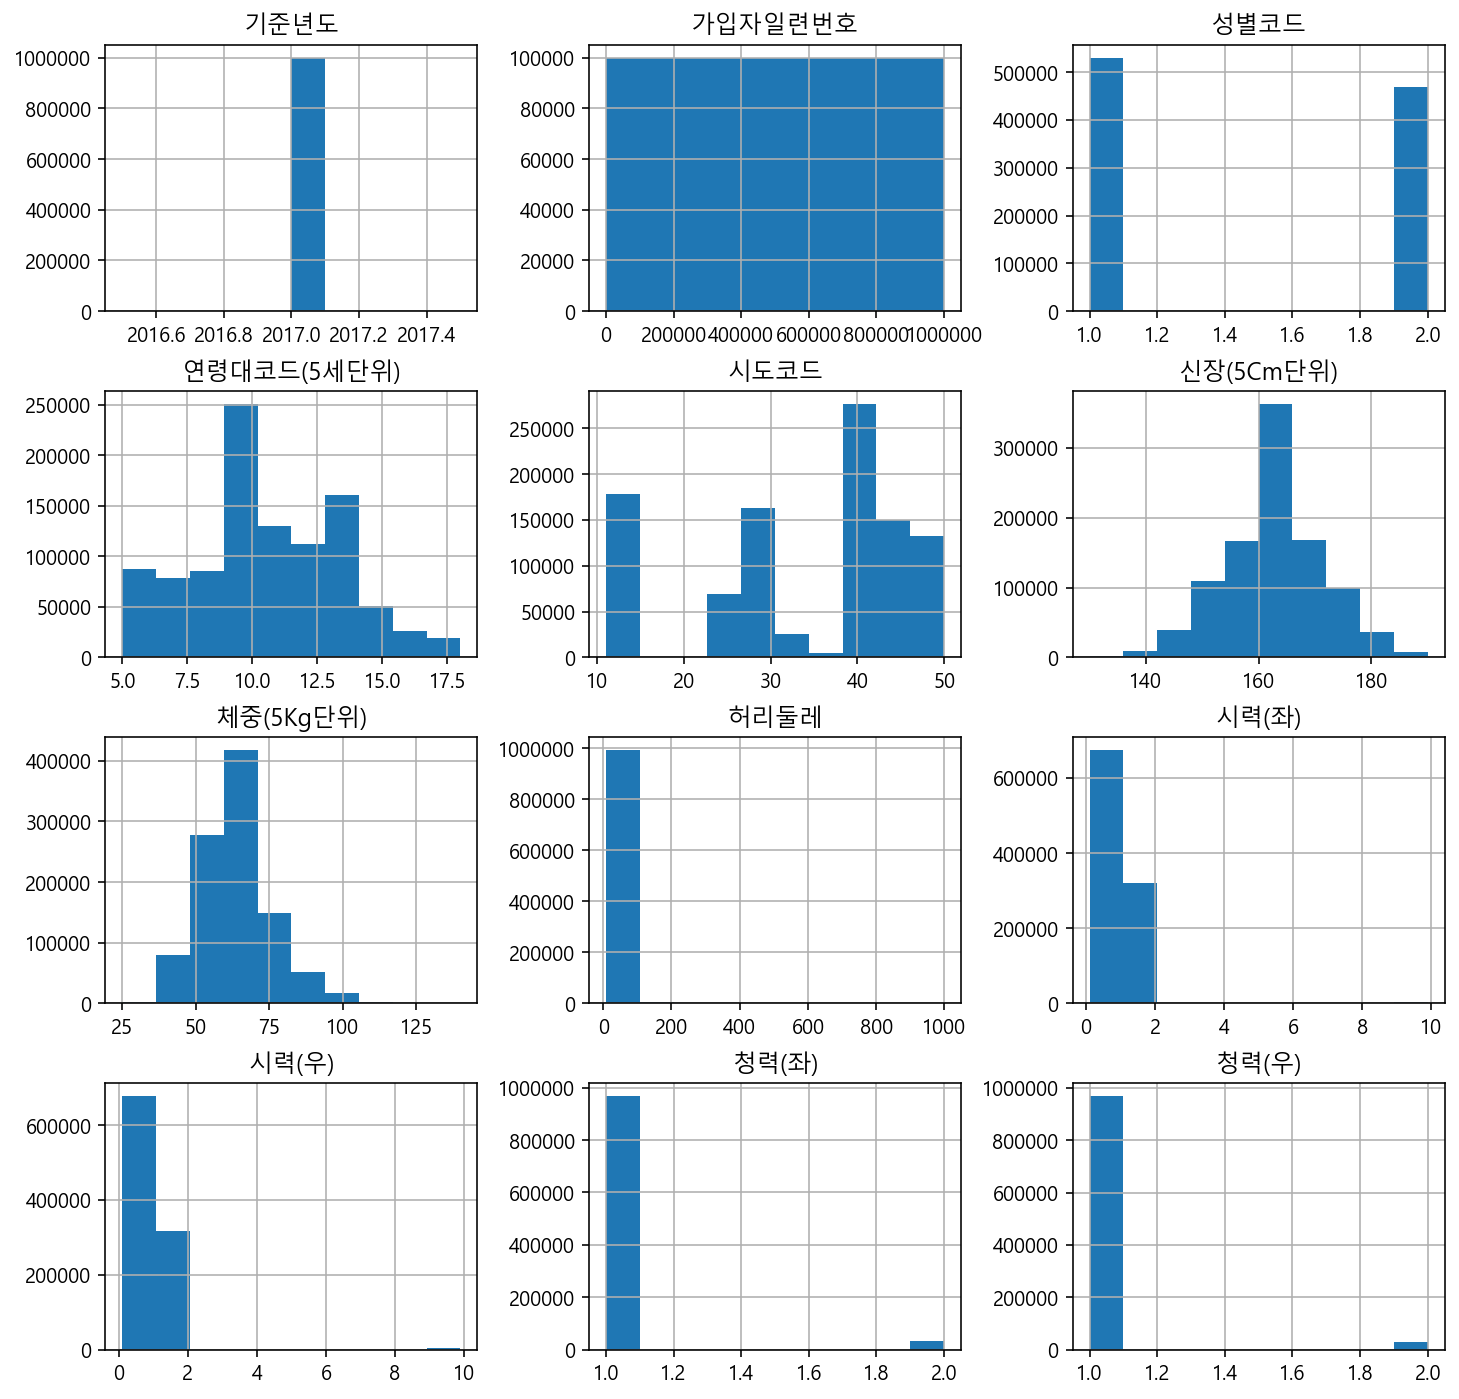

In [28]:
#슬라이싱 기능을 사용해서 데이터를 나누어 그린다 
#슬라이싱 사용시 iloc를 활용하면 인덱스의 순서대로 슬라이싱이 가능하다
#iloc[행, 열]순으로 인덱스를 써주면 해당 인덱스만 불러온다 
#앞에서 12개 컬럼에 대해서 히스토그램을 그려준다
h = df.iloc[:,:12].hist(figsize=(12,12)) 

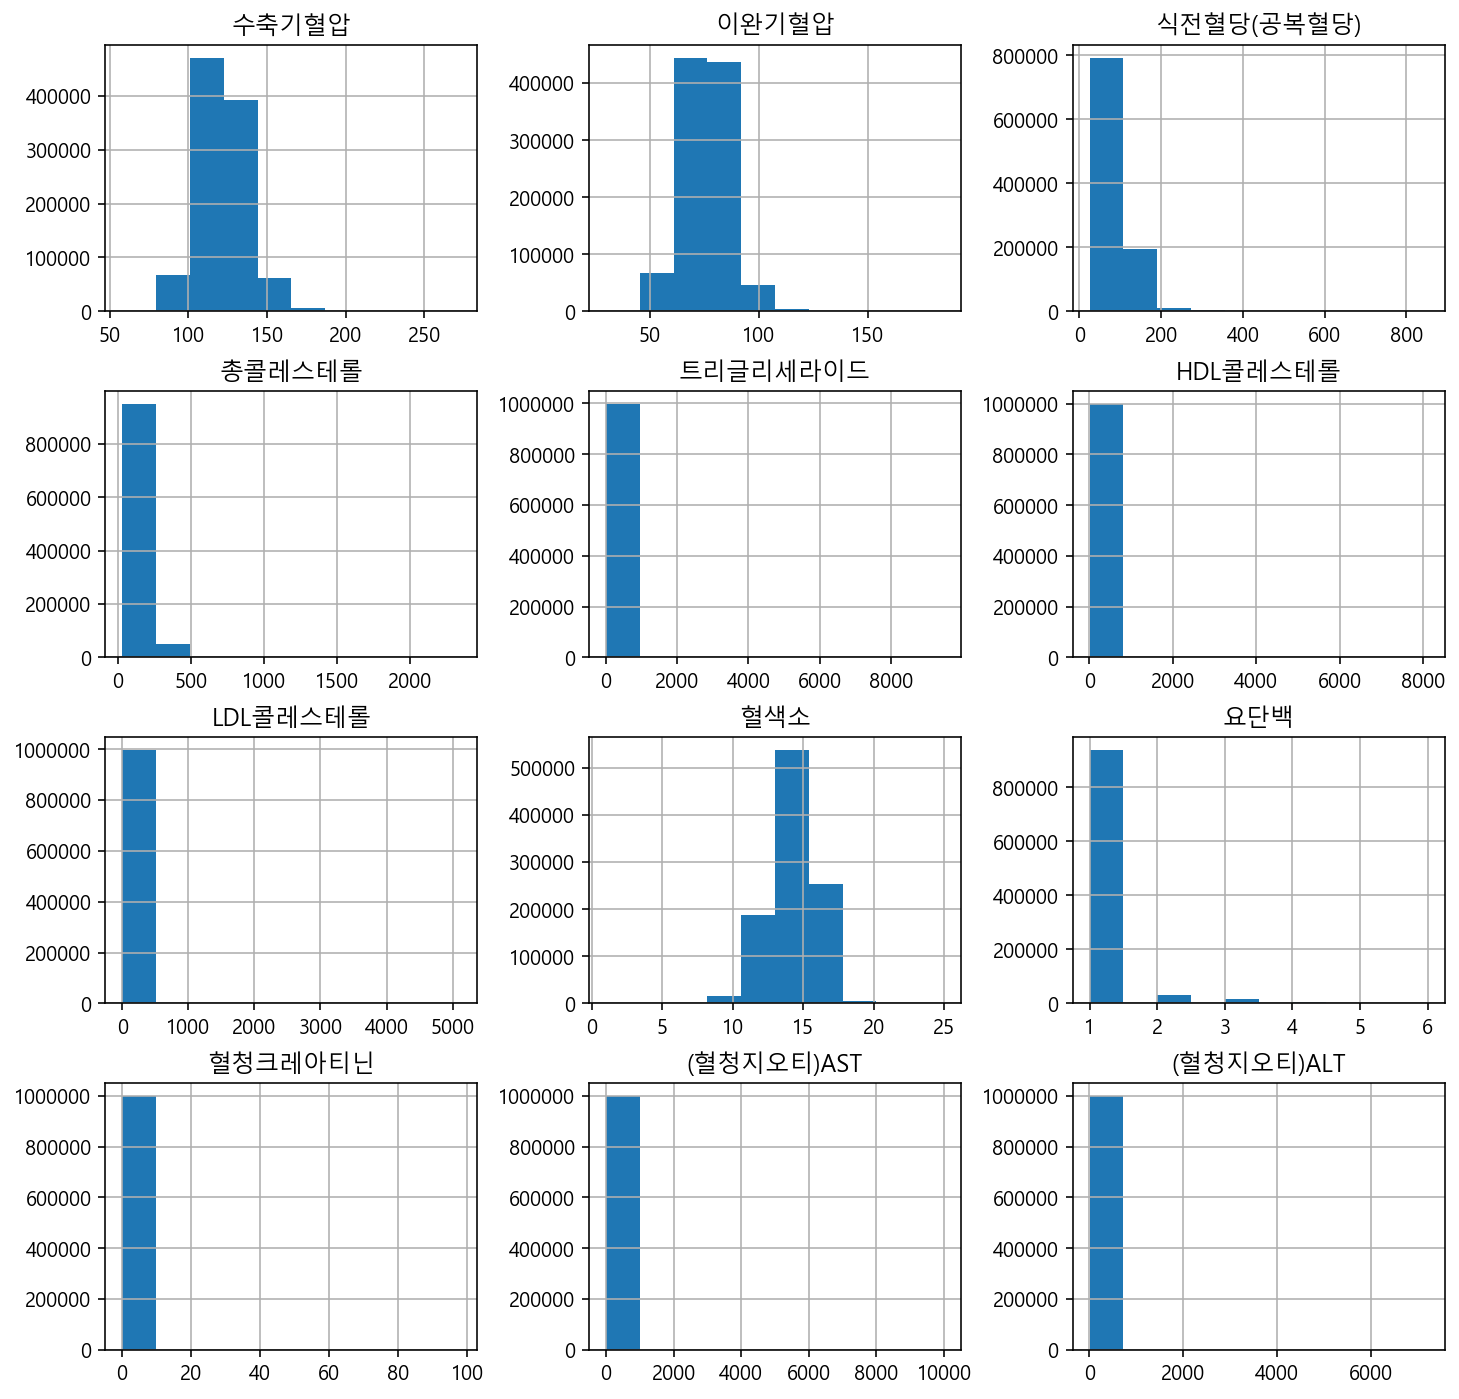

In [29]:
#슬라이싱을 사용해서 앞에서 12번째부터 23번째까지(12:24)컬럼에 대한 데이터로 히스토그램을 그린다
h = df.iloc[:, 12:24].hist(figsize=(12,12))

In [30]:
#4-5 끝

#4-6 시작. seaborn으로 데이터시각화하기

In [31]:
#seaborn을 이용하기 전에 전체데이터를 가져오면 속도가 오래 걸릴 것 같아서
#샘플데이터 100개를 가져와서 실습해볼 것이다
df_sample = df.sample(1000, random_state=1)
df_sample.shape

(1000, 34)

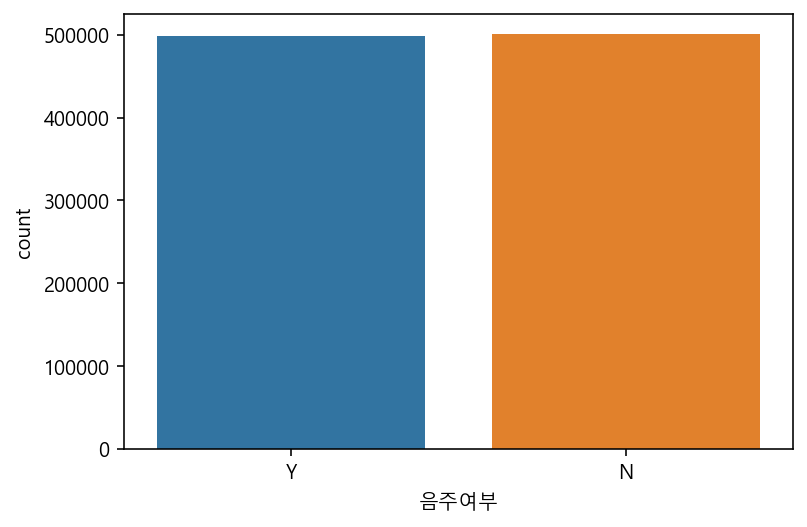

In [32]:
#범주형 데이터(문자형 데이터)와 수치형 데이터에 따라 시각화하는 방법이 조금 다르다
#음주여부에 따른 countplot을 그려보았다
sns.countplot(x="음주여부", data=df)

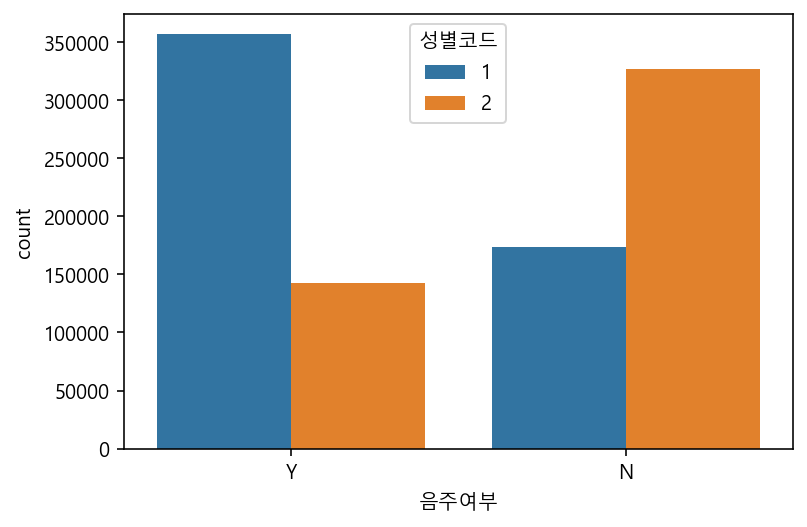

In [33]:
#성별에 따른 음주여부를 시각화해서 봐보았다
sns.countplot(data=df, x="음주여부", hue="성별코드")

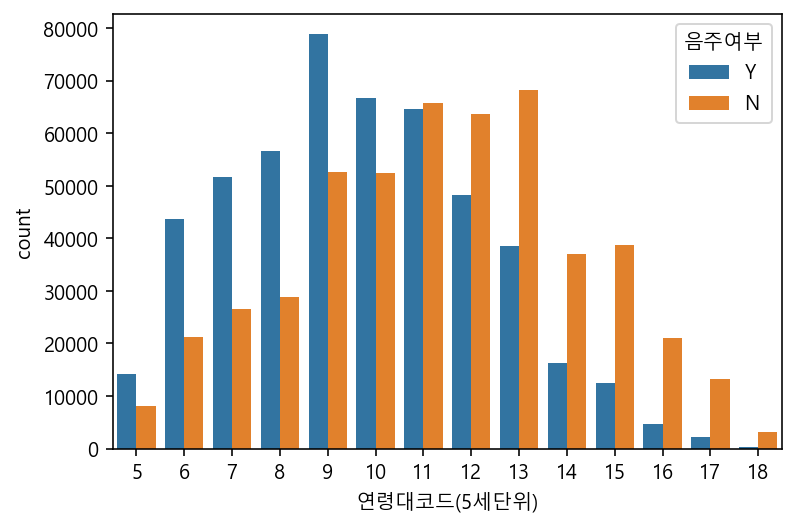

In [34]:
#연령대별 음주여부 시각화해보기
sns.countplot(data=df, x="연령대코드(5세단위)", hue="음주여부")

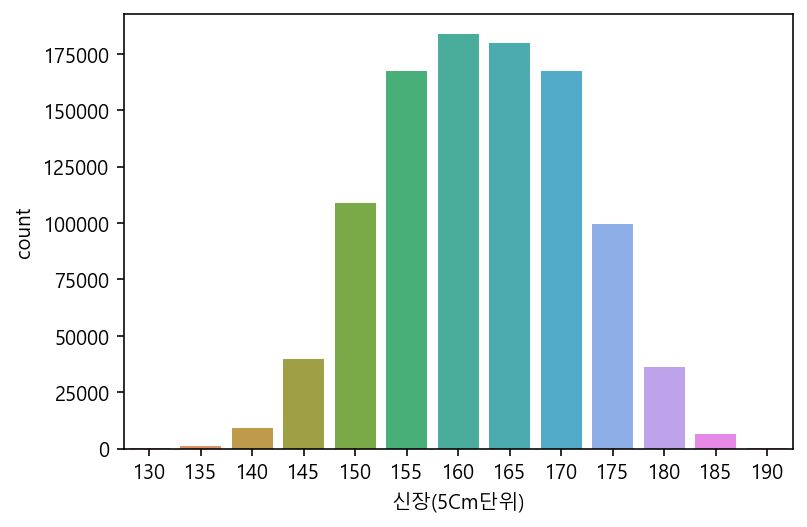

In [35]:
#키와 몸무게
sns.countplot(data=df, x="신장(5Cm단위)")

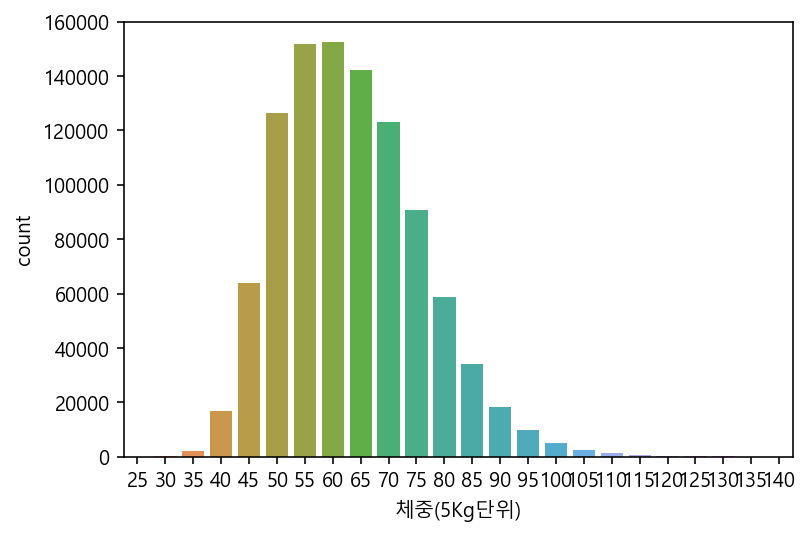

In [36]:
#체중 보기
sns.countplot(data=df, x="체중(5Kg단위)")

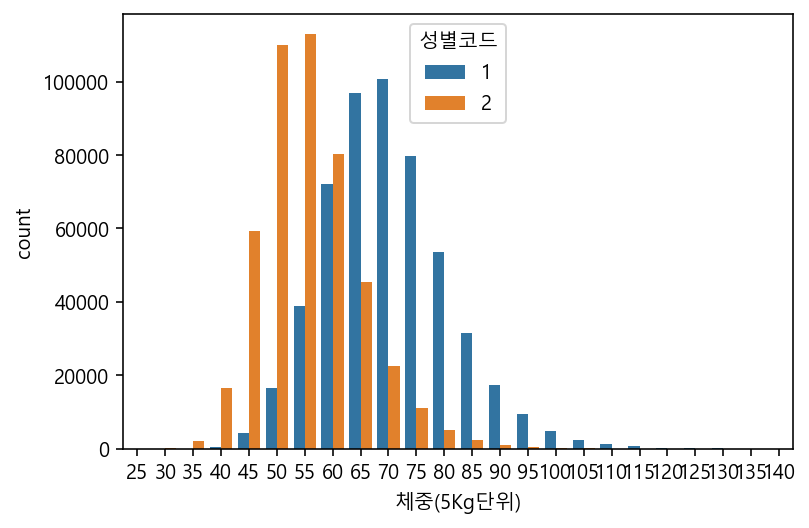

In [37]:
#성별에따른 체중 차이 보기 -> hue 사용
sns.countplot(data=df, x="체중(5Kg단위)", hue="성별코드")

In [38]:
#4-6 끝

#4-7 시작 barplot그리는 방법 배우기 (countplot과 약간의 차이가 있다)

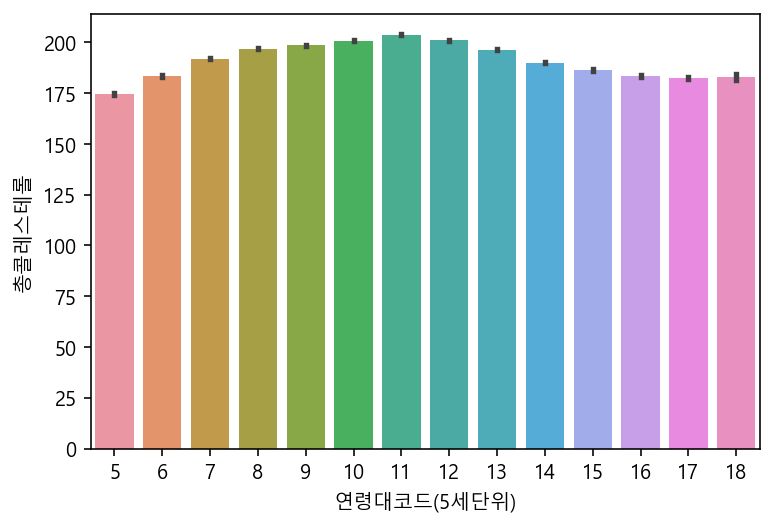

In [39]:
#수치형과 범주형데이터를 시각화할 때 barplot을 많이 사용한다
#연령대코드와 총콜레스테롤을 본다
#countplot과 비교했을때  barplot으로 그렸을 때 느리게 그려지는 것을 확인할 수 있다
#느리게 그려지는 이유는  y의 총콜레스테롤 각각의 평균들을 구하기때문이다
sns.barplot(data=df, x="연령대코드(5세단위)", y="총콜레스테롤")

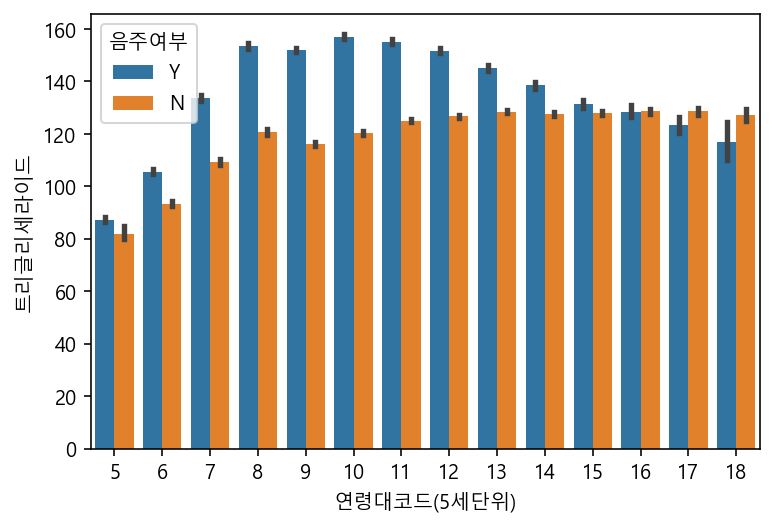

In [40]:
#트리글리세라이드(중성지방)에 따른 연령대코드(5세단위)를 음주여부에 따라 barplot으로 그린다
sns.barplot(data=df, x="연령대코드(5세단위)", y="트리글리세라이드", hue="음주여부")
#그래프 위로 나타나는 검은색 막대는 신뢰구간을 의미한다

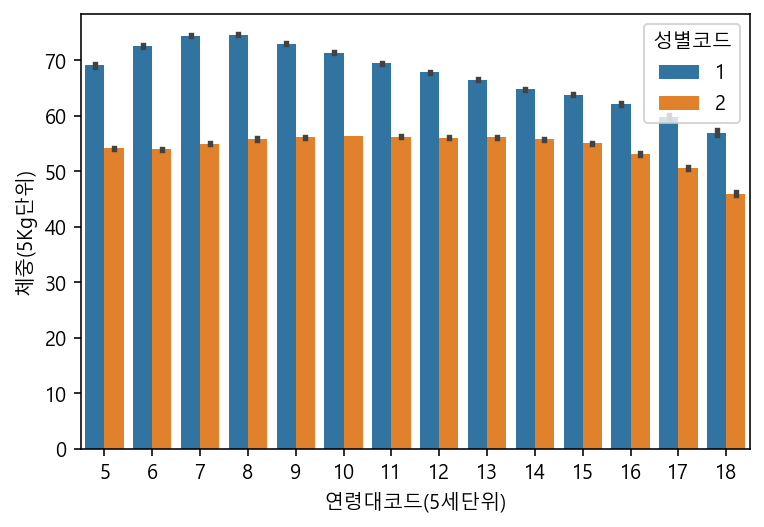

In [41]:
#연령대코드와 체중(5Kg 단위)을 성별에 따라 봅니다
sns.barplot(data=df, x="연령대코드(5세단위)", y="체중(5Kg단위)", hue="성별코드")
#연령대가 높아질수록 체중이 조금씩 줄고 있는 것을 볼 수 있다

In [42]:
#4-7 끝

#4-8 시작 lineplot()과 pointplot()으로 선그래프 그리기

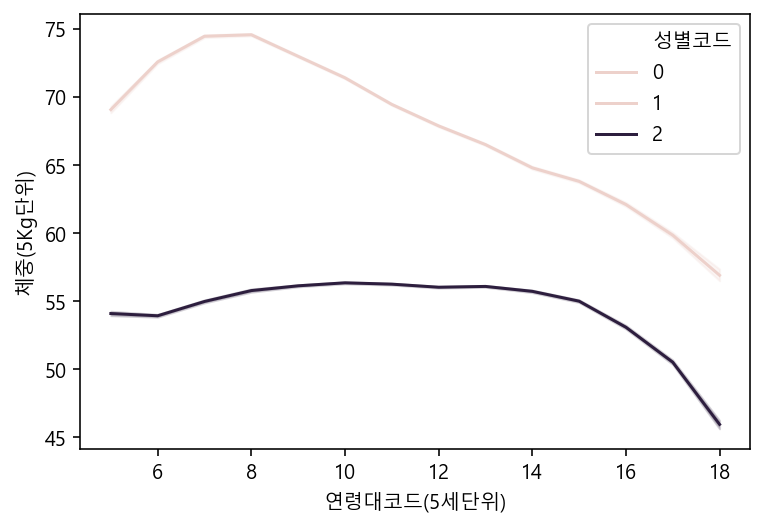

In [43]:
#위에서 그렸던 막대그래프를 lineplot을이용하여 선그래프로 그리기
#data를 전체데이터df로 하여서 시간이 조금 걸린다. 빠르게 출력해보고 싶으면 
#1000개의 샘플데이터인 df_sample을 써주면 빠르게 출력된다
sns.lineplot(data=df, x="연령대코드(5세단위)", y="체중(5Kg단위)", hue="성별코드")

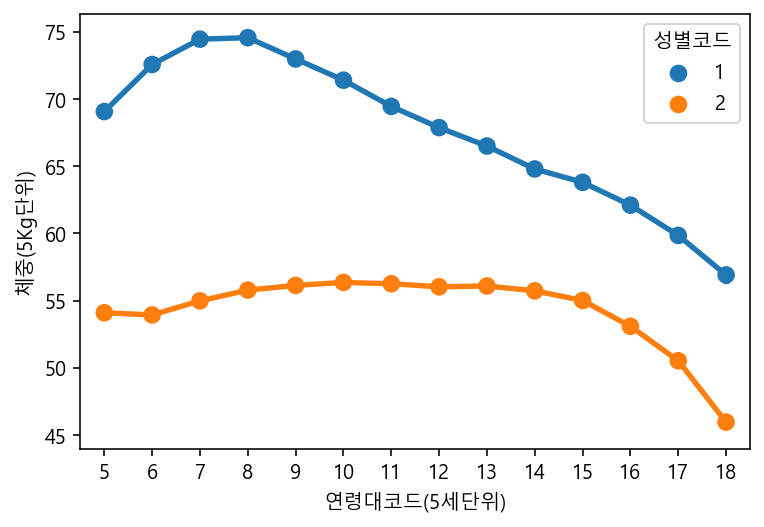

In [44]:
#pointplot을 그리면 위의 선그래프에 점을 표시해주는 것을 확인할 수 있다
sns.pointplot(data=df, x="연령대코드(5세단위)", y="체중(5Kg단위)", hue="성별코드")

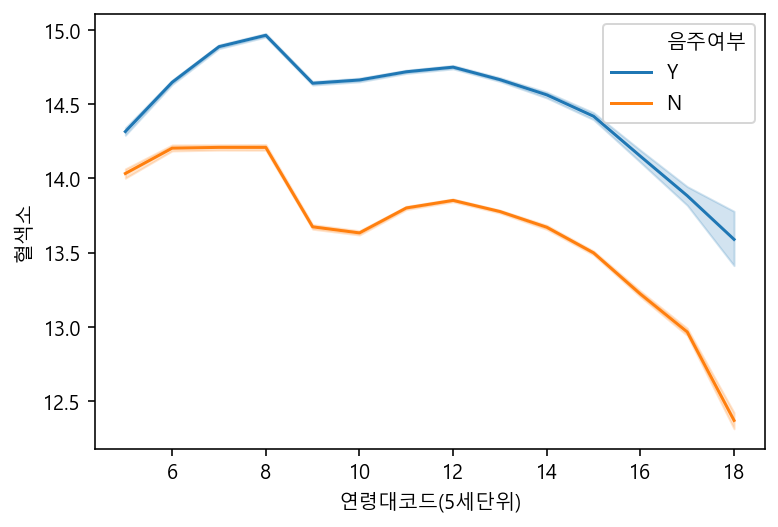

In [45]:
#연령대코드(5세단위)에 따른 혈색소를 음주여부에 따라 lineplot으로 그린다
#연령이 오를수록 혈색소가 줄어들고, 음주하고있는 사람들이 혈색소값이 더 높은 것을 확인할 수 있다
#그래프사이즈를 크게하려면 plt.figure(figsize=(15,4))를 작성한다
sns.lineplot(data=df, x="연령대코드(5세단위)", y="혈색소", hue="음주여부")

In [46]:
# barplot은 막대그래프로 개별값을 표현하고, 
#lineplot이나 pointplot으로는 선을통해 값의 기울기로 많고 적음을 표시해볼 수 있다
#lineplot이나 pointplot은 주식의 가격이나 부동산 가격, 재고량, 판매량이 그려지는데 많이 사용된다

In [48]:
#4-8끝

#4-9 시작 boxplot그리기

In [49]:
#상자 수염 그림 (위키백과)검색해서 사진보여주면서 설명
#박스의 윗선은  75%의 값, 박스안 중간선은 50%의 값, 박스 가장아랫선은 25%의 값
#점은 이상치를 의미, 가장 윗선은 최댓값, 가장아랫선은 최솟값을 의미
#이상치는 75%값 - 25%값을 계산하여 나온값에서, 이 값의 1.5배 이상 초과하는 값과 
#미달하는 값을 점으로 표현한 값이다

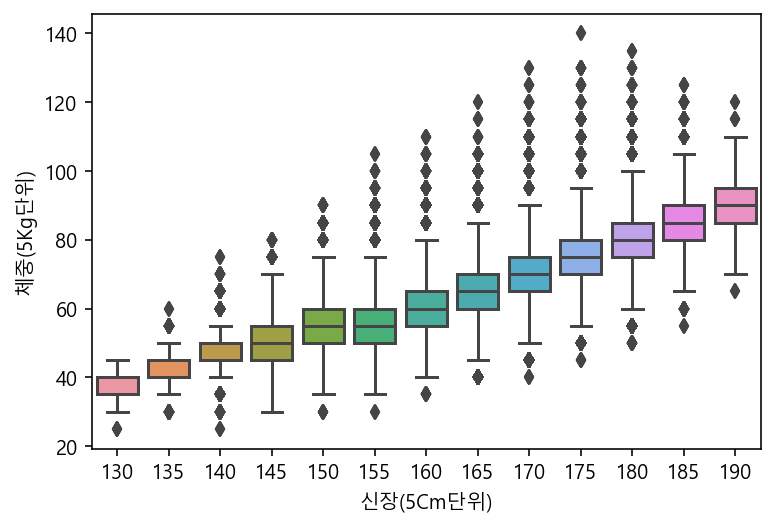

In [50]:
#boxplot으로 신장(5cm단위)에 따른 체중(5kg 단위)을 그린다
sns.boxplot(data=df, x="신장(5Cm단위)", y="체중(5Kg단위)")

In [51]:
#4-9 끝 

#4-10 수치형데이터를 시각화해보겠다 -> scatterplot(산점도)을 사용해볼 것이다

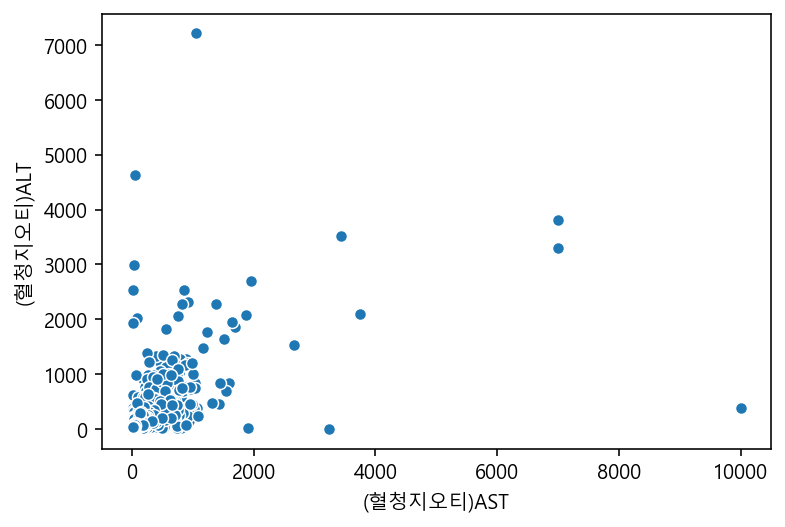

In [52]:
#scatterplot으로 (혈청지오티)AST, (혈청지오티)ALT를 그린다
#수치형 데이터의 상관관계를 볼 때 산점도 사용한다
sns.scatterplot(data=df, x="(혈청지오티)AST", y="(혈청지오티)ALT")
#점을 하나하나 다 표현하기때문에 시간이 좀더 오래 걸릴수 있다
#이는 그래프의 이상치를 파악하기에 좋다(상대적으로 떨어져있는 점 파악can)

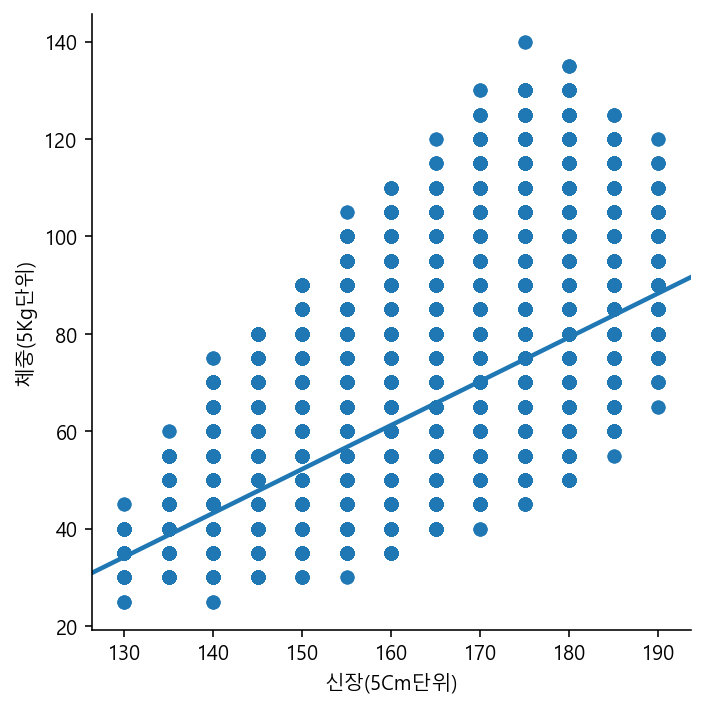

In [53]:
#lmplot으로 상관관계를 더 잘 파악해 볼 수 있다
#lmplot으로 신장(5cm단위)에 따른 체중(5kg단위)을 그려본다
sns.lmplot(data=df, x="신장(5Cm단위)", y="체중(5Kg단위)")

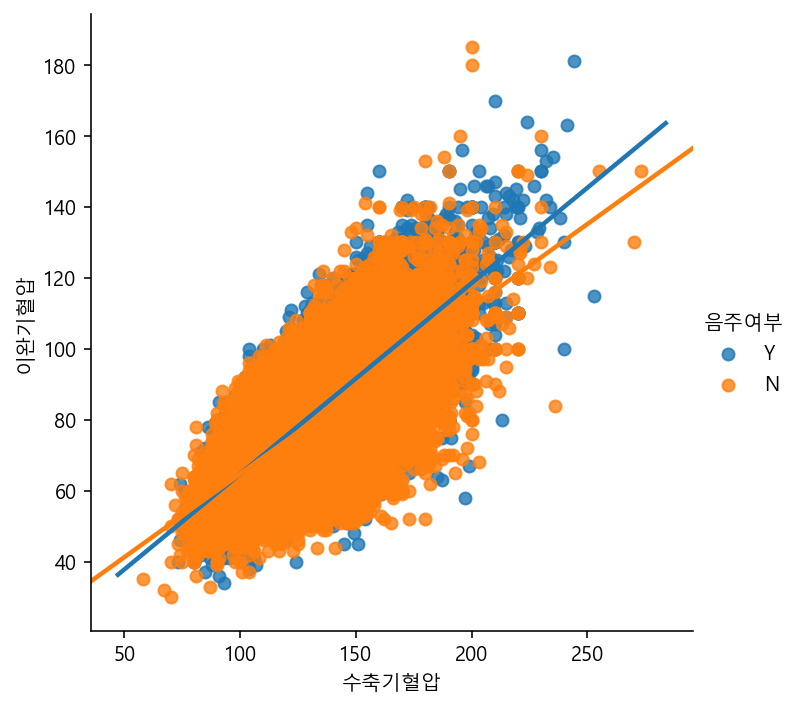

In [55]:
#lmplot으로 수축기, 이완기혈압을 그리고 음주여부에 따라 다른 색상으로 표현되게 한다
sns.lmplot(data=df, x="수축기혈압", y="이완기혈압", hue="음주여부")
# 결과는 x와 y와 강한상관관계가 있다는 것을 대각선으로 보여주어서 알 수 있다
#음주하고있는 사람들의 기울기가 더 가파른것을 볼 수 있다

In [ ]:
#4-10끝

In [ ]:
#최종적으로 데이터프렙을 이용하여 레포트 생성
#데이터프렙 불러오기
#상권업소 데이터셋으로 지난 시간에 학습하였던 데이터프렙 라이브러리를 가져와서 레포트를 생성해보았다
#데이터프렙 레포트 생성 부분의 용량이 커서 코드를 주석처리하였다
#from dataprep.eda import create_report

In [ ]:
# 레포트 생성 출력 -> 한눈에 파악 
#데이터프렙 레포트 생성 부분의 용량이 커서 코드를 주석처리하였다
#create_report(df)